In [1]:
import re
import pickle
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer
import string
from difflib import SequenceMatcher
from nltk.tokenize import word_tokenize
import nltk
import csv
from nltk import wordnet
from textblob import TextBlob
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()

In [2]:
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv("D:\\6th semester\\Introduction to Data Science Lab\\personality prediction\\Tweets by @realDonaldTrump.csv",encoding=DATASET_ENCODING )
dataset.head()
dataset = dataset[['User','Text']]
dataset.head()

,User,Text
0,@realDonaldTrump,âHeâs got a very good point. Somebody in t...
1,@realDonaldTrump,âIâve been skeptical about the collusion a...
2,@realDonaldTrump,âWeâve seen NO EVIDENCE OF COLLUSION....I ...
3,@realDonaldTrump,WITCH HUNT!
4,@realDonaldTrump,I want to encourage all of my many Texas frien...


In [3]:
def preprocess(textdata):
    processedText = []
    # Create Lemmatizer and Stemmer
    wordLemm = WordNetLemmatizer()
    # Regex patterns
    emoji=r'\\u[1F600-1F6FF]'
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    for tweet in textdata:
        tweet = tweet.lower()
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' ',tweet)
        # Replace all emojis.
        tweet = re.sub(emoji, ' ' ,tweet)        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' ', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            # If word not in stopwordlist
            if len(word)>1:
                
                word = wordLemm.lemmatize(word)
            
                tweetwords += (word+' ')
        processedText.append(tweetwords)
        
    return processedText

In [4]:
import time
# nltk.download('all')
t = time.time()
processedtext = preprocess(dataset['Text'])
dataset['clean data']=processedtext
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 3 seconds


In [5]:
dataset.head()

,User,Text,clean data
0,@realDonaldTrump,âHeâs got a very good point. Somebody in t...,he got very good point somebody in the justice...
1,@realDonaldTrump,âIâve been skeptical about the collusion a...,ve been skeptical about the collusion and obst...
2,@realDonaldTrump,âWeâve seen NO EVIDENCE OF COLLUSION....I ...,we ve seen no evidence of collusion have seen ...
3,@realDonaldTrump,WITCH HUNT!,witch hunt
4,@realDonaldTrump,I want to encourage all of my many Texas frien...,want to encourage all of my many texas friend ...


In [6]:
f1=open("introvert.txt")
f2=open("extrovert.txt")
file1=f1.read()
file2=f2.read()

In [7]:
#similarity of the personality by file reading
tweets=dataset.values[:,2]
print(tweets)
for i in range(len(tweets)):
    print(f"index: {i}, ",tweets[i])
 

['he got very good point somebody in the justice department ha treasure trove of evidence of mr clinton criminality at her own hand or through others that ought to be investigated fully agree with the president on that on show '
 've been skeptical about the collusion and obstruction claim for the last year just don see the evidence in term of the collusion it all bit implausible based on the evidence we have jonathan turley on '
 'we ve seen no evidence of collusion have seen nothing the firing of james comey and all of the aftermath that suggests that the president ha obstructed justice because he exercising his power a the president of the just don see it judge ken starr '
 ...
 'thank you brock it is my honor we have never had the support that we have had from this president administrator '
 'congressman pete session of texas is doing great job he is fighter who will be tough on crime and the border fight hard for our second amendment and love our military and our vet he ha my full

In [8]:
labels=""
row=[]
for i in range(len(tweets)):
    #tokennizing tweets
    word_token = word_tokenize(tweets[i]) 
    similarity_intro=SequenceMatcher(None,file1,tweets[i]).ratio()
    similarity_extro=SequenceMatcher(None,file2,tweets[i]).ratio()
    similarity_intro*=100
    similarity_extro*=100
    if similarity_intro > similarity_extro:
        label="introvert"
    elif similarity_intro < similarity_extro:
        label="extrovert"
    else:
        label="neutral"
    row.append([tweets[i],similarity_intro,similarity_extro,label])

with open('labels.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(row)):
        writer.writerow(row[i])

In [9]:
dataset1= pd.read_csv("labels.csv",names=["clean_data","Intro_Ratio","Extro_Ratio","Label"])
dataset1.head()

,clean_data,Intro_Ratio,Extro_Ratio,Label
0,he got very good point somebody in the justice...,0.836237,1.511716,extrovert
1,ve been skeptical about the collusion and obst...,1.275691,0.923788,introvert
2,we ve seen no evidence of collusion have seen ...,0.411805,0.446097,extrovert
3,witch hunt,0.819001,1.442741,extrovert
4,want to encourage all of my many texas friend ...,1.243953,0.749064,introvert


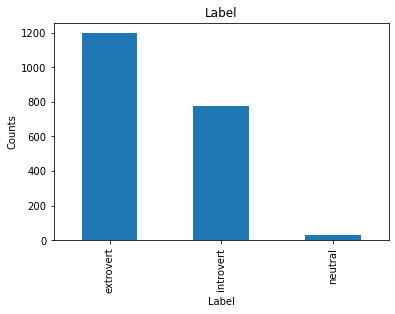

In [10]:
dataset1['Label'].value_counts()
plt.title('Label')
plt.xlabel('Label')
plt.ylabel('Counts')
dataset1['Label'].value_counts().plot(kind='bar')
plt.show()

([<matplotlib.patches.Wedge at 0x1da218fa9d0>,
 [Text(-0.3349850587205633, 1.0477523612161324, 'extrovert'),
  Text(0.28859341127148075, -1.0614677776412669, 'introvert'),
  Text(1.098936228646309, -0.04836491878032523, 'neutral')])

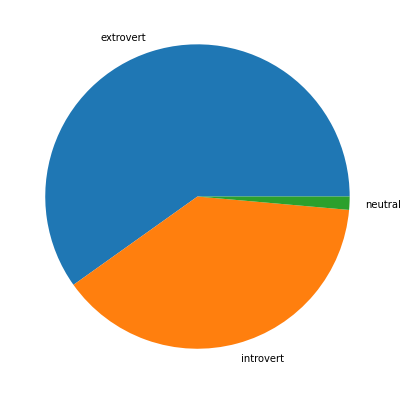

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.pie(dataset1['Label'].value_counts(), labels = dataset1['Label'].unique())

In [12]:
dataset1.fillna("NAN",inplace=True)

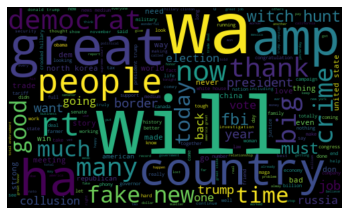

In [13]:
#plot the world cloud
All_word=' '.join([twts for twts in dataset1['clean_data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(All_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
intro_tweets=dataset1[dataset1['Label']=='introvert']
intro_tweets.head()


,clean_data,Intro_Ratio,Extro_Ratio,Label
1,ve been skeptical about the collusion and obst...,1.275691,0.923788,introvert
4,want to encourage all of my many texas friend ...,1.243953,0.749064,introvert
8,such beautiful map thank you,3.228410,2.307010,introvert
10,the heritage foundation ha just stated that 64...,0.814111,0.587372,introvert
11,have decided that section of the wall that cal...,0.970874,0.601504,introvert


In [15]:
extro_tweets=dataset1[dataset1['Label']=='extrovert']
extro_tweets.head()

,clean_data,Intro_Ratio,Extro_Ratio,Label
0,he got very good point somebody in the justice...,0.836237,1.511716,extrovert
2,we ve seen no evidence of collusion have seen ...,0.411805,0.446097,extrovert
3,witch hunt,0.819001,1.442741,extrovert
5,american consumer are the most confident they ...,6.314244,8.000000,extrovert
6,texas lc george bush backed me when it wasn th...,0.545703,1.033973,extrovert


In [16]:
neu_tweets=dataset1[dataset1['Label']=='neutral']
neu_tweets.head()

,clean_data,Intro_Ratio,Extro_Ratio,Label
185,NAN,0.0,0.0,neutral
283,NAN,0.0,0.0,neutral
714,NAN,0.0,0.0,neutral
759,NAN,0.0,0.0,neutral
829,NAN,0.0,0.0,neutral


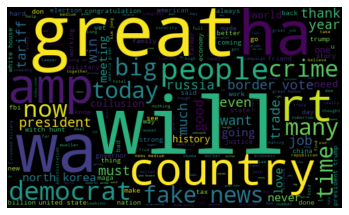

In [17]:
intro_word=' '.join([twts for twts in intro_tweets['clean_data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(intro_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

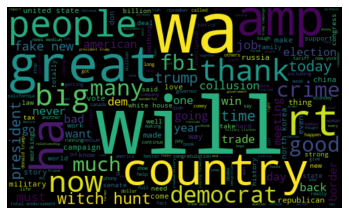

In [18]:
extro_word=' '.join([twts for twts in extro_tweets['clean_data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(extro_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

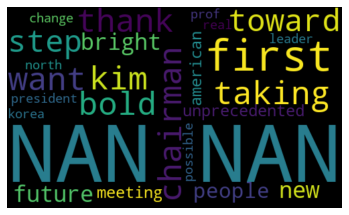

In [19]:
neu_word=' '.join([twts for twts in neu_tweets['clean_data']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(neu_word)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
dataset1['Label'].unique()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset1[ 'Label'] = le.fit_transform(dataset1[ 'Label'])
dataset1.head()

x=dataset1['clean_data']
y=dataset1['Label']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.5, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectorizer.fit(X_train)
print(f'Vectorizer fitted')
print('No. of feature_words: ',len(vectorizer.get_feature_names()))

Vectorizer fitted
No. of feature_words:  22131


In [23]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(f'Data Transformed')

Data Transformed


In [24]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    
    # classification report
    print(classification_report(y_test, y_pred))
    
    # confusion report
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    categories = ['Extrovert', 'Introvert','Neutral']
    
    group_names = ['True Neg', 'False Pos','False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

C:\Users\Namra\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Namra\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Namra\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       605
           1       1.00      0.02      0.04       382
           2       0.00      0.00      0.00        13

    accuracy                           0.61      1000
   macro avg       0.54      0.34      0.27      1000
weighted avg       0.75      0.61      0.47      1000



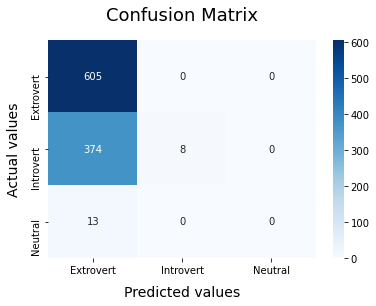

In [25]:
#not selected
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       605
           1       0.48      0.25      0.33       382
           2       1.00      0.92      0.96        13

    accuracy                           0.61      1000
   macro avg       0.71      0.67      0.67      1000
weighted avg       0.58      0.61      0.58      1000



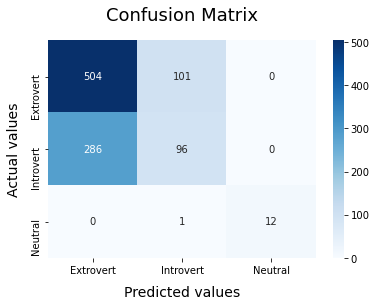

In [26]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  
model_evaluate(classifier)

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       605
           1       0.53      0.33      0.41       382
           2       1.00      0.92      0.96        13

    accuracy                           0.63      1000
   macro avg       0.73      0.69      0.70      1000
weighted avg       0.62      0.63      0.61      1000



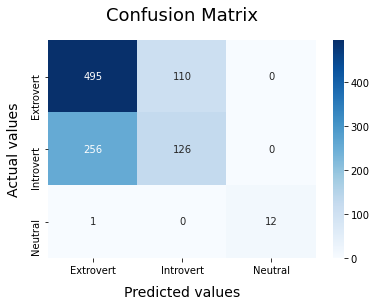

In [27]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       605
           1       0.57      0.27      0.37       382
           2       1.00      0.92      0.96        13

    accuracy                           0.64      1000
   macro avg       0.74      0.69      0.69      1000
weighted avg       0.63      0.64      0.61      1000



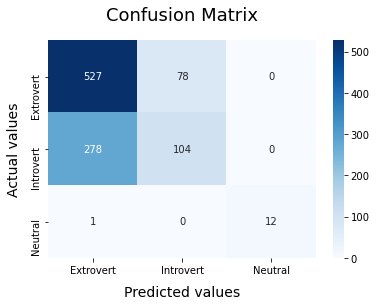

In [28]:
LRmodel = LogisticRegression(C =2, max_iter=1000, n_jobs=1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

In [29]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-RF.pickle','wb')
pickle.dump(classifier, file)
file.close()

file = open('Sentiment-Svc.pickle','wb')
pickle.dump(SVCmodel, file)
file.close()

In [30]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    # Load the Random Forest Model.
    file = open('..path/Sentiment-RF.pickle', 'rb')
    RFmodel = pickle.load(file)
    file.close()
    
    # Load the Support Vector Model.
    file = open('..path/Sentiment-Svc.pickle', 'rb')
    SVmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel,RFmodel,SVmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text,sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['Text','Sentiment'])
    df = df.replace([0,1,2], ["Extrovert","Introvert","Neutral"])
    return df